In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [28]:
dataset = pd.read_csv('dataset/creditcard.csv')

In [29]:
dataset.shape

(284807, 31)

In [30]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
# check for unique categorical values in each column
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        print(f'{col}: {dataset[col].unique()} {dataset[col].unique().size}')

In [32]:
# check for missing values
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [33]:
# check for class imbalance
dataset['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

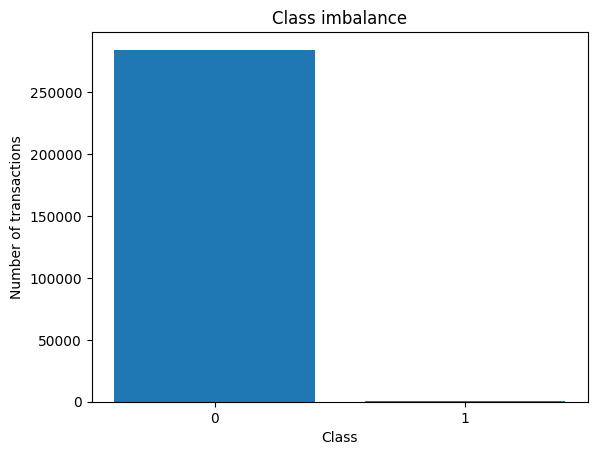

In [34]:
# separate ones and zeros
ones = dataset[dataset['Class'] == 1]
zeros = dataset[dataset['Class'] == 0]

# plot class imbalance
plt.bar(['0', '1'], [zeros.shape[0], ones.shape[0]])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.title('Class imbalance')
plt.show()

In [35]:
# take smaller subset of data so that the data is balanced
zeros = zeros.sample(ones.shape[0])

# combine the two subsets
dataset = pd.concat([zeros, ones], axis=0)

# shuffle the dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [36]:
# separate features and labels
X = dataset.drop(columns=['Class'])
y = dataset['Class']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=112)